# Survival Analysis

In [4]:
# Import Packages:
using Pkg
#Pkg.add("CSV")
#Pkg.add("DataFrames")
#Pkg.add("StatsBase")
#Pkg.add("SQLite")
#Pkg.add("Plots")

   Resolving package versions...
   Installed LoggingExtras ───────────── v1.1.0
   Installed JpegTurbo_jll ───────────── v3.0.4+0
   Installed LERC_jll ────────────────── v4.0.0+0
   Installed libfdk_aac_jll ──────────── v2.0.3+0
   Installed libdecor_jll ────────────── v0.2.2+0
   Installed Libmount_jll ────────────── v2.40.2+0
   Installed GR_jll ──────────────────── v0.73.8+0
   Installed Opus_jll ────────────────── v1.3.3+0
   Installed ConcurrentUtilities ─────── v2.4.2
   Installed Xorg_libpthread_stubs_jll ─ v0.1.1+1
   Installed Xorg_libSM_jll ──────────── v1.2.4+0
   Installed PlotUtils ───────────────── v1.4.3
   Installed Unitful ─────────────────── v1.21.1
   Installed HTTP ────────────────────── v1.10.12
   Installed Cairo_jll ───────────────── v1.18.2+1
   Installed Libgpg_error_jll ────────── v1.50.0+0
   Installed Fontconfig_jll ──────────── v2.13.96+0
   Installed Xorg_libXau_jll ─────────── v1.0.11+1
   Installed Pango_jll ───────────────── v1.54.1+0
   Installed FFM

In [2]:
# Read the CSV File:
using CSV
using DataFrames
using Dates
using Plots

[ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b] (cache misses: incompatible header (2))
[ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0] (cache misses: incompatible header (2))
[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] (cache misses: incompatible header (2))
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a] (cache misses: incompatible header (2))


In [3]:
# Load the CSV file
#file_path = "../data/AbsenceList_SampleData.csv"  # Update with the correct file path
file_path = "../data/AbsenceList_TransitionMatrix.csv"  # Update with the correct file path
data = CSV.File(file_path, delim='\t') |> DataFrame

# Rename variable names in order to get rid of the spaces in the names
rename!(data,[:Full_name,:First_name, :ID, :Class, :Start_date, :Start_time, :End_date, :End_time])
describe(data)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Nothing,Union…,Nothing,Union…,Int64,DataType
1,Full_name,,Vincent,,Vincent,0,String7
2,First_name,,Charlie,,Charlie,0,String7
3,ID,,,,,22,Missing
4,Class,,CS101,,CS101,0,String7
5,Start_date,,"Dec 4, 2023",,"Oct 3, 2023",0,String15
6,Start_time,,10:30 AM,,8:30 AM,0,String15
7,End_date,,"Dec 4, 2023",,"Oct 3, 2023",0,String15
8,End_time,,10:15 AM,,9:20 AM,0,String15


In [4]:
##### ##### Formatting of some variables ##### ##### (should be written in cleaner code!)

##### Create a new date variable for "Start date"
# This step is necessary as the variable is not standard and therefore not recognized by the "Date" package.


# Extract the last 4 characters of "Start date" and create a new column "Year"
data[!, "Year"] = last.(string.(data[!, :Start_date]), 4)

# Extract the first 5 characters of "Start date" and create a new column "First5Chars"
data[!, "First5Chars"] = first.(string.(data[!, :Start_date]), 6)

# Remove the comma from "First5Chars" and update the column
data[!, "First5Chars"] = replace.(data[!, "First5Chars"], "," => "")

# Extract the first three characters of "First5Chars" and create a new column "Month"
data[!, "Month"] = first.(string.(data[!, "First5Chars"]), 3)

# Extract the last two characters of "First5Chars" and create a new column "Day"
data[!, "Day"] = last.(string.(data[!, "First5Chars"]), 2)


# Define a dictionary to map month abbreviations to numerical values
month_dict = Dict("Jan" => 1, "Feb" => 2, "Mar" => 3, "Apr" => 4, "May" => 5, "Jun" => 6, "Jul" => 7, "Aug" => 8, "Sep" => 9, "Oct" => 10, "Nov" => 11, "Dec" => 12)

# Create a new column "MonthNumeric" by mapping the month abbreviations to numerical values
data[!, "MonthNumeric"] = [month_dict[strip(string(month))] for month in data[!, "Month"]]

# Create a new column "NewDate" by combining "Year," "MonthNumeric," and "Day"
data[!, "StartDate"] = Dates.Date.(parse.(Int, data[!, "Year"]), data[!, "MonthNumeric"], parse.(Int, data[!, "Day"]))

# Suppose you want to delete columns "Month" and "Year"
select!(data, Not(:Month, :Year, :Day, :First5Chars, :MonthNumeric  ))


##### Create a new date variable for "End date"
# This step is necessary as the variable is not standard and therefore not recognized by the "Date" package.

# Extract the last 4 characters of "Start date" and create a new column "Year"
data[!, "Year"] = last.(string.(data[!, :End_date]), 4)

# Extract the first 5 characters of "Start date" and create a new column "First5Chars"
data[!, "First5Chars"] = first.(string.(data[!, :End_date]), 6)

# Remove the comma from "First5Chars" and update the column
data[!, "First5Chars"] = replace.(data[!, "First5Chars"], "," => "")

# Extract the first three characters of "First5Chars" and create a new column "Month"
data[!, "Month"] = first.(string.(data[!, "First5Chars"]), 3)

# Extract the last two characters of "First5Chars" and create a new column "Day"
data[!, "Day"] = last.(string.(data[!, "First5Chars"]), 2)


# Define a dictionary to map month abbreviations to numerical values
month_dict = Dict("Jan" => 1, "Feb" => 2, "Mar" => 3, "Apr" => 4, "May" => 5, "Jun" => 6, "Jul" => 7, "Aug" => 8, "Sep" => 9, "Oct" => 10, "Nov" => 11, "Dec" => 12)

# Create a new column "MonthNumeric" by mapping the month abbreviations to numerical values
data[!, "MonthNumeric"] = [month_dict[strip(string(month))] for month in data[!, "Month"]]

# Create a new column "NewDate" by combining "Year," "MonthNumeric," and "Day"
data[!, "EndDate"] = Dates.Date.(parse.(Int, data[!, "Year"]), data[!, "MonthNumeric"], parse.(Int, data[!, "Day"]))

# Suppose you want to delete columns "Month" and "Year"
select!(data, Not(:Month, :Year, :Day, :First5Chars, :MonthNumeric  ))


##### Create a new date variable for "Start time"
# This step is necessary as the variable is not standard and therefore not recognized by the "Date" package.

starttime = data[!, :Start_time]
meridiem = last.(starttime,2)
time = first.(starttime,5)
hourtemp = first.(time,2)
minutetemp = last.(time,3)
minutetemp1 = replace.(minutetemp, ":" => "")
minutetemp2 = replace.(minutetemp1, " " => "")

hour = replace.(hourtemp, ":" => "")
minute = minutetemp2

data[!,"StartTimeHour"] = hour;
data[!,"StartTimeMinute"] = minute;
data[!,"StartTimeMeridiem"] = meridiem;

# Define as Time format
data[!,"time_format_str"] = hour .* ":" .* minute .* " " .* meridiem
data[!,"StartTime"] = Dates.Time.(data[!,"time_format_str"], dateformat"HH:MM p")

# Drop variables
select!(data, Not(:StartTimeHour, :StartTimeMinute, :StartTimeMeridiem, :time_format_str  ))

##### Create a new date variable for "End time"
# This step is necessary as the variable is not standard and therefore not recognized by the "Date" package.

endtime = data[!, :End_time]
meridiem = last.(endtime,2)
time = first.(endtime,5)
hourtemp = first.(time,2)
minutetemp = last.(time,3)
minutetemp1 = replace.(minutetemp, ":" => "")
minutetemp2 = replace.(minutetemp1, " " => "")

hour = replace.(hourtemp, ":" => "")
minute = minutetemp2

data[!,"EndTimeHour"] = hour;
data[!,"EndTimeMinute"] = minute;
data[!,"EndTimeMeridiem"] = meridiem;

# Define as Time format
data[!,"time_format_str"] = hour .* ":" .* minute .* " " .* meridiem
data[!,"EndTime"] = Dates.Time.(data[!,"time_format_str"], dateformat"HH:MM p")

# Drop variables
select!(data, Not(:EndTimeHour, :EndTimeMinute, :EndTimeMeridiem, :time_format_str  ))

first(data)

Row,Full_name,First_name,ID,Class,Start_date,Start_time,End_date,End_time,StartDate,EndDate,StartTime,EndTime
,String7,String7,Missing,String7,String15,String15,String15,String15,Date,Date,Time,Time
1,Vincent,Charlie,missing,CS101,"Oct 3, 2023",8:30 AM,"Oct 3, 2023",9:20 AM,2023-10-03,2023-10-03,08:30:00,09:20:00


In [5]:
## Compute new variable: minutes missed on a given day

data[!, "TimeMissed"] = data[!, "EndTime"] - data[!, "StartTime"] 

# Convert to minutes
data[!, "MinutesMissed"] = floor.(Int, Dates.value.(data[!, "TimeMissed"]) / (60 * 10^9))

# Drop variables
select!(data, Not(:TimeMissed ))

first(data)

Row,Full_name,First_name,ID,Class,Start_date,Start_time,End_date,End_time,StartDate,EndDate,StartTime,EndTime,MinutesMissed
,String7,String7,Missing,String7,String15,String15,String15,String15,Date,Date,Time,Time,Int64
1,Vincent,Charlie,missing,CS101,"Oct 3, 2023",8:30 AM,"Oct 3, 2023",9:20 AM,2023-10-03,2023-10-03,08:30:00,09:20:00,50


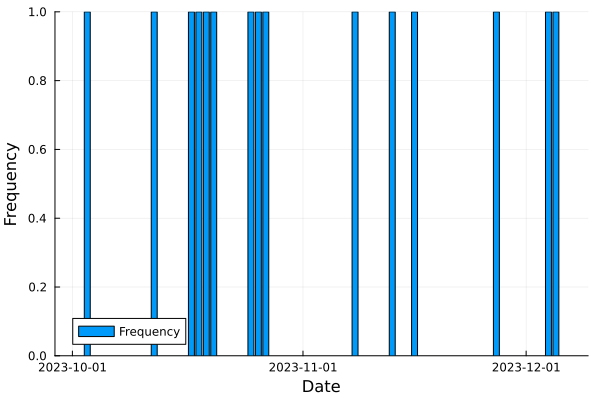

In [6]:
## Aggregate several lessons of the same day into one observation

# Create a new DataFrame with the required variables
result_df = combine(groupby(data, [:Full_name, :StartDate]), :MinutesMissed => sum)

# Rename columns for clarity
rename!(result_df, :MinutesMissed_sum => :TotalMinutesMissed)

# Display the result DataFrame
first(result_df)



# Scatter plot of the daily absences ("result_df")
scatter(result_df[!, "StartDate"], result_df[!, :Full_name], size=(800, 400), marker=:circle, color=:blue, label="Absences", xlabel="Start Time", ylabel="Full Name")



## Count the number of individuals with absences for a given date

# Group by start time and calculate the frequency for each time
time_summary = combine(groupby(result_df, :StartDate), nrow)

# Display the frequency table
first(time_summary)


## Scatter plot number of individuals absent on a given day
scatter(time_summary[!, :StartDate], time_summary[!, :nrow], xlabel="Start Time", ylabel="Frequency", label="Frequency")


## Bar chart of number of indivuals missing on a given day
bar(time_summary[!, :StartDate], time_summary[!, :nrow], xlabel="Date", ylabel="Frequency", label="Frequency")



In [7]:
## Create a new dataframe with observations for an entire period and with both states

# Feature engineering: Extract day of the week
result_df[!, :DayOfWeek] = Dates.dayname.(Dates.Date.(result_df[!, :StartDate]))

# Filter out weekends and holidays
weekdays_df = result_df[(result_df[!, :DayOfWeek] .!= "Saturday") .& (result_df[!, :DayOfWeek] .!= "Sunday"), :]


# Group by student and weekday and count absences
grouped_df = groupby(weekdays_df, [:Full_name, :DayOfWeek])
count_df = combine(grouped_df, :TotalMinutesMissed => sum => :AbsenceCount)


# Find the weekday with the maximum absences for each student
max_absence_day_df = combine(groupby(count_df, :Full_name), :AbsenceCount => argmax => :DayOfWeek, :AbsenceCount => maximum => :MaxAbsences)

# Add a column with the corresponding weekday
max_absence_day_df[!, :Weekday] = Dates.dayname.(Dates.Date.(max_absence_day_df[!, :DayOfWeek]))

# Display the result
first(max_absence_day_df)


# Create a DataFrame with all the dates you want to include
all_dates = DataFrame(StartDate = Date(2023, 9, 19):Date(2023, 12, 15))

# Filter weekdays
all_dates = filter(row -> Dates.dayofweek(row.StartDate) in 2:6, all_dates)


describe(result_df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,DataType
1,Full_name,,Vincent,,Vincent,0,String7
2,StartDate,,2023-10-03,2023-10-26,2023-12-05,0,Date
3,TotalMinutesMissed,164.467,2,105.0,330,0,Int64
4,DayOfWeek,,Friday,,Wednesday,0,String


In [8]:
## Create a database with all school days

# Rename the DataFrame
df = result_df

# Keep only the rows where DayOfWeek is "Friday"
df_filtered = filter(row -> row.:Full_name == "Vincent", df)



## Create database of absences : binary variable (0=no absence; 1=absence)

# Define the input DataFrame
df_full = DataFrame(
    Full_name = String[],
    StartDate = Date[],
    TotalMinutesMissed = Int64[],
    DayOfWeek = String[]
)

# Define the date range
date_range = Date(2023, 9, 27):Day(1):Date(2023, 12, 8)

# Populate the DataFrame with the specified formats
for date in date_range
    push!(df_full, [
        "Vincent",
        date,
        0,
        Dates.format(date, "EEEE")
    ])
end

df_full = filter(row -> row.DayOfWeek != "Saturday" && row.DayOfWeek != "Sunday", df_full)



## Merge the two dataframes into one
merged = outerjoin(df_full, df_filtered, on = :StartDate, makeunique=true)




## Create new binary variable : 0 = "no absence" , 1 = "absent"

# Create a new binary variable
 
function create_binary_variable(variableA)
  new_variable = fill(0, length(variableA))
  for i in 1:length(variableA)
    if ismissing(variableA[i])
      new_variable[i] = 0
    else
      new_variable[i] = 1
    end
  end
  return new_variable
end

merged[!,:absences] = create_binary_variable(merged.DayOfWeek_1)

merged_absences = merged

select!(merged_absences, Not(:TotalMinutesMissed, :Full_name_1	, :TotalMinutesMissed_1, :DayOfWeek_1  ))

first(merged_absences)

Row,Full_name,StartDate,DayOfWeek,absences
,String?,Date,String?,Int64
1,Vincent,2023-10-03,Tuesday,1


In [9]:
## Compute transition matrix
sort!(merged_absences, (:StartDate))
first(merged_absences[merged_absences.Full_name .== "Vincent", :])

Row,Full_name,StartDate,DayOfWeek,absences
,String?,Date,String?,Int64
1,Vincent,2023-09-27,Wednesday,0


## Computing a transition matrix between the states "absent" and "not absent"

A transition matrix is a mathematical tool used to model the probability of moving from one state to another in a system. In the following code, the transition matrix is used to model the probability of transitioning from one state of absence to another.

The transition matrix is defined as a square matrix $P$ with dimensions $n \times n$, where $n$ is the number of states in the system. Each element $P(i,j)$ of the matrix represents the probability of transitioning from state $i$ to state $j$. The sum of the probabilities in each row of the matrix must be equal to 1.

In your code, the transition matrix is computed using the following steps:

1. Construct the state and previous state.
2. Get the number of occurrences for each transition.
3. Get the number of occurrences for each state.
4. Compute the transition probability.
5. Remove unnecessary rows and columns.
6. Transform the data into a matrix format.

The resulting matrix is a transition matrix that models the probability of transitioning from one state of absence to another. The matrix can be used to analyze the behavior of the system and make predictions about future states.

In [10]:
# sort the absences of a student by Startdate
absences = sort!(merged_absences, :StartDate, rev=false)

Row,Full_name,StartDate,DayOfWeek,absences
,String?,Date,String?,Int64
1,Vincent,2023-09-27,Wednesday,0
2,Vincent,2023-09-28,Thursday,0
3,Vincent,2023-09-29,Friday,0
4,Vincent,2023-10-02,Monday,0
5,Vincent,2023-10-03,Tuesday,1
6,Vincent,2023-10-04,Wednesday,0
7,Vincent,2023-10-05,Thursday,0
8,Vincent,2023-10-06,Friday,0
9,Vincent,2023-10-09,Monday,0


In [11]:
## Computing the transition matrix

# Construct state and previous state
statelag=absences[1:end-1,:absences]
state=absences[2:end,:absences]
df = DataFrame(state=state, statelag=statelag)

# Get the number of occurrences for each transition
df = transform(groupby(df, [:statelag, :state]), nrow => :cat_countmar)

# Get the number of occurrences for each state
df = transform(groupby(df, :statelag), nrow => :cat_count) 

# Get the transition probability 
df[:,:prob] = df[:,:cat_countmar]./df[:,:cat_count]

# Remove unnecessary rows and columns
trans = unique(df[:,[:statelag,:state,:prob]])
  
# Transform into a matrix format
reshape_trans = unstack(trans,:state,:prob)


Row,statelag,0,1
,Int64,Float64?,Float64?
1,0,0.756757,0.243243
2,1,0.6,0.4


In [12]:
# Transition matrix
transition_matrix = Matrix(reshape_trans[:,2:3])

2×2 Matrix{Union{Missing, Float64}}:
 0.756757  0.243243
 0.6       0.4

In [13]:
# export "absences" into a csv file 
CSV.write("temp/absences.csv", absences)

"temp/absences.csv"

## Absence Probability Model Documentation

### Overview

This model calculates the probability of absence for each day of the week based on historical attendance data.

### Probability Calculation Equation

#### Formal Equation

$$
P( \text{Absence} | \text{Day} ) = \frac{ \text{  Number of Absence Days } }{ \text{ Total Days for that Day } } 
$$

#### Components

- Input Variables:
  - Total_Days: Number of occurrences of a specific day of the week
  - Absence_Days: Number of days with absences for that specific day of the week


#### Calculation Steps

1. Group data by day of the week
2. Count total days for each day
3. Count absence days for each day
4. Divide absence days by total days

#### Model Assumptions

- Binary absence state (0 or 1)
- Independent daily absence events
- Historical pattern represents future probability

#### Limitations

- Small sample size may affect accuracy
- Does not account for external factors
- Assumes consistent absence patterns

#### Statistical Properties

- Range: $0 \leq P( \text{Absence} ) \leq 1$
- Interpretation:
  - 0: Never absent
  - 1: Always absent
  - 0.5: 50% chance of absence

Absence Probabilities by Day of Week:
5×4 DataFrame
 Row │ DayOfWeek  Total_Days  Absence_Days  Absence_Probability 
     │ String15   Int64       Int64         Float64             
─────┼──────────────────────────────────────────────────────────
   1 │ Monday             10             3             0.3
   2 │ Tuesday            10             3             0.3
   3 │ Wednesday          11             3             0.272727
   4 │ Thursday           11             4             0.363636
   5 │ Friday             11             2             0.181818


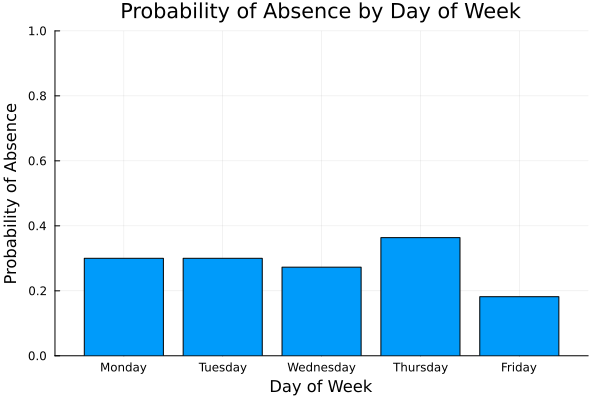

In [2]:
using CSV
using DataFrames
using Plots

# Read the CSV file
df = CSV.read("temp/absences.csv", DataFrame)

# Calculate absence probability for each day of the week
function calculate_absence_probability(dataframe::DataFrame)
    # Group by day of the week and calculate absence probability
    day_absence_prob = combine(
        groupby(dataframe, :DayOfWeek),
        :absences => length => :Total_Days,
        :absences => sum => :Absence_Days
    )
    
    # Calculate probability of absence
    day_absence_prob[!, :Absence_Probability] = 
        day_absence_prob.Absence_Days ./ day_absence_prob.Total_Days
    
    return day_absence_prob
end

# Perform the analysis
absence_probabilities = calculate_absence_probability(df)

# Define week order and reorder the dataframe
week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
absence_probabilities = absence_probabilities[
    sortperm(absence_probabilities.DayOfWeek, by = x -> findfirst(y -> y == x, week_order)), 
    :
]

# Display the results
println("Absence Probabilities by Day of Week:")
println(absence_probabilities)

# Visualize the results
plot(
    absence_probabilities.DayOfWeek, 
    absence_probabilities.Absence_Probability, 
    title = "Probability of Absence by Day of Week",
    xlabel = "Day of Week", 
    ylabel = "Probability of Absence",
    seriestype = :bar,
    ylims = (0, 1),
    legend = false
)
#savefig("absence_probability_plot.png")

## Sources

see [Survival Analysis](../markdown/survival-analysis.md)

## SANDBOX

In [25]:

#merged_absences
#CSV.write("temp/merged_absences.csv", merged_absences)

# list all the vaiables in the memory
#varinfo()